# 10 plotting libraries

[Xavier Dupré](http://www.xavierdupre.fr/)

Senior Engineer at Microsoft France on Azure ML | Teacher in Computer Science at the [ENSAE](http://www.ensae.fr/)
------------------------------------------------|-----------------------------------------------------------------
![Azure ML](logo_azureml.png) | ![ENSAE](ENSAE_logo_developpe.jpg)


In [1]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu(last_level=2)

## Overview

In [2]:
add_notebook_menu(keep_item=0)

### Why so many?

* Every domain has its own data representation (statistics, machine learning, biology, maps...)
* Many supports (images, web site, notebooks)
* High volume of data requires specific solution (maps)

### Impact of notebooks

* **Before:** graphs libraries were **mostly static** (images)
* **After:** graphs are now **interactive** (javascript)

### Graph language

We like them because we read them faster.

In [3]:
%matplotlib inline

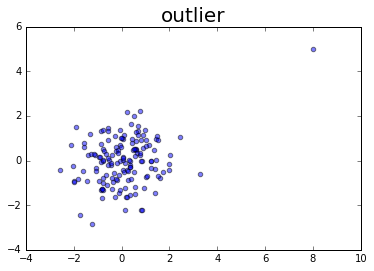

In [4]:
import numpy, matplotlib.pyplot as plt
N = 150
x, y = numpy.random.normal(0, 1, N), numpy.random.normal(0, 1, N)
x[-1], y[-1] = 8, 5
plt.scatter(x, y, alpha=0.5)
plt.title("outlier", size=20)

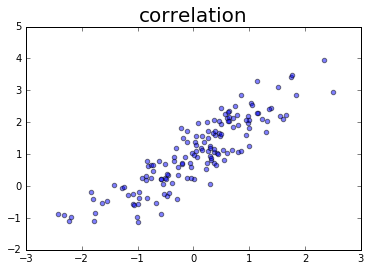

In [5]:
import numpy, matplotlib.pyplot as plt
N = 150
x = numpy.random.normal(0, 1, N)
y = x + numpy.random.normal(0, 0.5, N) + 1
plt.scatter(x, y, alpha=0.5)
plt.title("correlation", size=20)

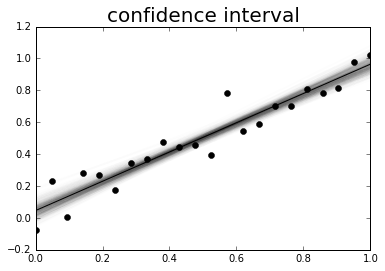

In [6]:
import scipy, numpy
nx, nboot = 22, 400
x = scipy.linspace(0.0, 1.0, nx) 
data = x + numpy.random.normal(loc=0.0, scale=0.1, size=nx) 
yp = scipy.polyfit(x, data, 1) 
y = scipy.polyval(yp,x) 
r = data - y 
for i in range(nboot):
    pc = scipy.polyfit(x, y + r[scipy.random.randint(0, nx-1, nx)], 1) 
    plt.plot(x, scipy.polyval(pc,x), 'k-', linewidth=2, alpha=3.0/float(nboot)) 
plt.plot(x, y, 'k-') 
plt.plot(x, data, 'ko')
plt.title("confidence interval", size=20)

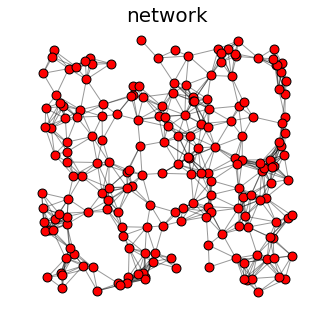

In [13]:
from jupytalk.talk_examples.pydata2016 import example_networkx
ax = example_networkx()
ax.set_title("network", size=20)

### Different kinds

* **image**
    * [matplotlib](http://matplotlib.org/) based
    * [Pillow](https://pillow.readthedocs.io/en/) based
* **interactive**
    * javascript based
    * Python based
* **pure javascript**
    * from a notebook
    * from a web page

## Static

In [8]:
add_notebook_menu(keep_item=1)

### Standard: matplotlib

* [matplotlib](http://matplotlib.org/)

Build on the top of [matplotlib]()

* [seaborn](https://web.stanford.edu/~mwaskom/software/seaborn/) (statistics)
* [networkx](https://networkx.github.io/) (graphs)
* [ete3](http://etetoolkit.org/) (tree)
* [basemap](http://matplotlib.org/basemap/) (maps)

### Specific

* [biopython](http://biopython.org/wiki/Biopython) (genomic)
* [lifelines](http://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html) (survival analsys)
* ...

In [ ]:
brython mxgraph